In [33]:
import numpy as np
import pandas as pd
import math 
data = pd.read_csv(r'C:\Users\rohit\Downloads\most_runs_average_strikerate.csv')
data.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.70,131.99
1,SK Raina,5386,160,3916,33.66,137.54
2,RG Sharma,4902,161,3742,30.45,131.00
3,DA Warner,4717,114,3292,41.38,143.29
4,S Dhawan,4601,137,3665,33.58,125.54


In [34]:
p1=data.loc[:,data.columns=="total_runs"]
v1=np.array(p1)
v1=v1.reshape(516,1)

In [35]:
p2=data.loc[:,data.columns=="out"]
v2=np.array(p2)
v2=v2.reshape(516,1)

In [36]:
p=[]
for i in range(0,len(v1)):
    x=[]
    x.append(v1[i])
    x.append(v2[i])
    p.append(x)
X=np.array(p)
X=X.reshape(516,2)
print(X)

[[5426  152]
 [5386  160]
 [4902  161]
 ...
 [   0    2]
 [   0    1]
 [   0    1]]


In [37]:
p3=data.loc[:,data.columns=="average"]
v3=np.array(p3)
v3=v3.reshape(516,1)

In [38]:
r0 = data["average"].round()
r=np.array(r0)
r=r.reshape(516,1)

In [39]:
p4=data.loc[:,data.columns=="numberofballs"]
v4=np.array(p4)
v4=v4.reshape(516,1)

In [40]:
z=[]
for i in range (0,len(v2)):
    if (v3[i]>=15):
        z.append(int(1))
    else:
        z.append(int(0))  
y=np.array(z)
y=y.reshape(516,)


# SVM

In [41]:
import numpy as np
import time
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
from sklearn import svm
a2=time.perf_counter()
clf = svm.SVC(random_state=42,gamma='auto')
clf.fit(X_train, y_train)
svm=clf.score(X_test, y_test)
b2=time.perf_counter()
print(svm)



0.8838709677419355


# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
a1=time.perf_counter()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
k_score=neigh.score(X,y)
k_pred= neigh.predict(X)
b1=time.perf_counter()
print(k_score)

0.9651162790697675


# DT

In [121]:
p=[]
for i in range(0,len(v1)):
    x=[]
    x.append(v1[i])
    x.append(v2[i])
    x.append(v4[i])
    p.append(x)
A=np.array(p)
A=A.reshape(516,3)

In [122]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [123]:
from sklearn.model_selection import train_test_split
Tr_X, Te_X, Tr_y, Te_y =train_test_split(A,y,test_size=0.2)
ml_model =tree.DecisionTreeClassifier()
ml_model = ml_model.fit(Tr_X,Tr_y)
dt=ml_model.score(Tr_X, Tr_y)
dt=ml_model.score(Te_X,Te_y)
print(dt)


0.9423076923076923


[Text(558.0, 509.625, 'X[0] <= 109.0\ngini = 0.497\nsamples = 516\nvalue = [277, 239]'),
 Text(174.375, 441.675, 'X[0] <= 14.5\ngini = 0.255\nsamples = 293\nvalue = [249, 44]'),
 Text(139.5, 373.725, 'gini = 0.0\nsamples = 128\nvalue = [128, 0]'),
 Text(209.25, 373.725, 'X[1] <= 1.5\ngini = 0.391\nsamples = 165\nvalue = [121, 44]'),
 Text(69.75, 305.775, 'X[1] <= 0.5\ngini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(34.875, 237.825, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(104.625, 237.825, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(348.75, 305.775, 'X[0] <= 57.5\ngini = 0.31\nsamples = 146\nvalue = [118, 28]'),
 Text(174.375, 237.825, 'X[1] <= 2.5\ngini = 0.17\nsamples = 96\nvalue = [87, 9]'),
 Text(104.625, 169.875, 'X[0] <= 30.0\ngini = 0.391\nsamples = 30\nvalue = [22, 8]'),
 Text(69.75, 101.92500000000001, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(139.5, 101.92500000000001, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(244.125, 169.875, 'X[0] <=

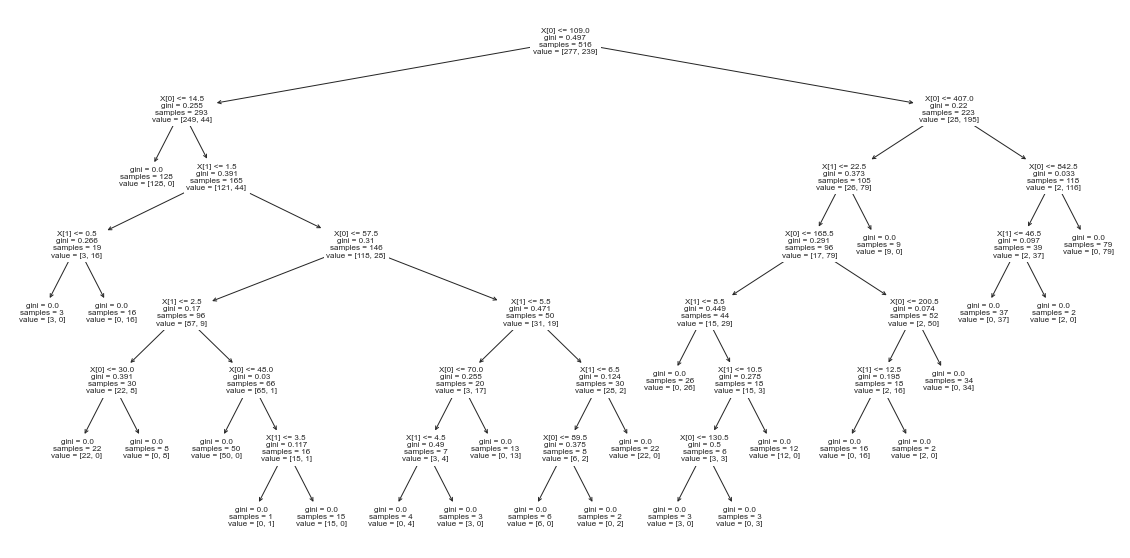

In [99]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(20,10))
tree.plot_tree(clf)

# Linear Regression

In [65]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
x_train,x_test,y_train,y_test=train_test_split(v1,y,test_size=0.3)

In [66]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
lir=regr.score(x_test, y_test)
print(lir)

0.21345779476973015


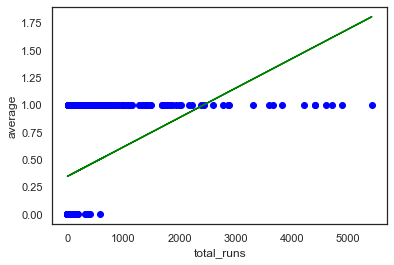

Msq: 0.20


In [67]:
viz_train = plt
viz_train.scatter(x_train, y_train, color='blue')
viz_train.plot(x_train, regr.predict(x_train), color='green')
viz_train.xlabel('total_runs')
viz_train.ylabel('average')
viz_train.show()
p=mean_squared_error(y_test, y_pred)
print('Msq: %.2f'% p)

# Logistic Regression

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
x_train,x_test,y_train,y_test=train_test_split(v1,y,test_size=0.3)

In [69]:
regr = linear_model.LogisticRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
lor=regr.score(x_test, y_test)
print(lor)

0.8258064516129032


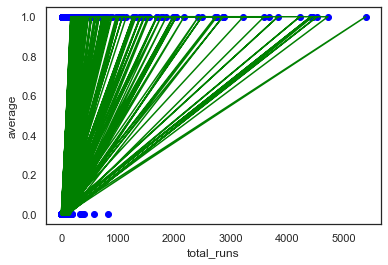

Msq: 0.17


In [70]:
viz_train = plt
viz_train.scatter(x_train, y_train, color='blue')
viz_train.plot(x_train, regr.predict(x_train), color='green')
viz_train.xlabel('total_runs')
viz_train.ylabel('average')
viz_train.show()
p=mean_squared_error(y_test, y_pred)
print('Msq: %.2f'% p)

# Naive bayes

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, r, test_size=0.25, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [72]:
y_pred=y_pred.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [73]:
nb=gnb.score(y_test,y_pred)
print(nb)

0.2558139534883721


# Random Forest

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(A, y, test_size=0.3)

In [83]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [84]:
from sklearn import metrics
rf=metrics.accuracy_score(y_test, y_pred)
print(rf)

0.9354838709677419


# Ploting

In [124]:
mse = []
mse.append(svm)
mse.append(k_score)
mse.append(dt)
mse.append(lir)
mse.append(lor)
mse.append(nb)
mse.append(rf)
col={'Accuracy': mse}
models=['SVM', 'KNN', 'Desicion_Tree', 'Linear_Regression','Logistic_Regression','Naive_bayes','Random_forest']
df = pd.DataFrame(data=col, index=models)
df

,Accuracy
SVM,0.883871
KNN,0.965116
Desicion_Tree,0.942308
Linear_Regression,0.213458
Logistic_Regression,0.825806
Naive_bayes,0.255814
Random_forest,0.935484


<AxesSubplot:>

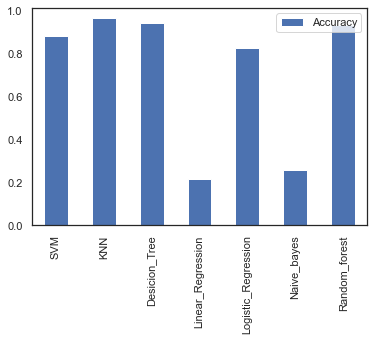

In [125]:
df.plot(kind='bar')

<AxesSubplot:>

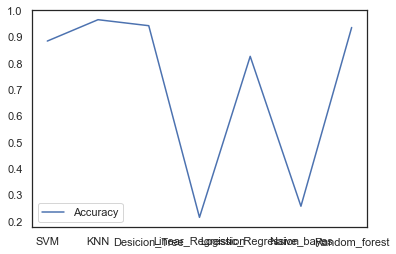

In [126]:
df.plot(kind='line')

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

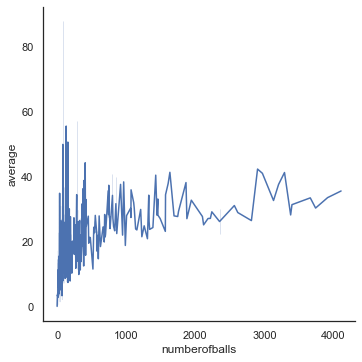

In [128]:
sns.relplot(x='numberofballs',y='average',data=data,kind='line')